In [23]:
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import pickle
import importlib

import numpy as np
from matplotlib import pyplot as plt

In [103]:
with open('/Users/jmdunca2/do-dem/reference_files/all_targets.pickle', 'rb') as f:
    all_targets = pickle.load(f)

In [141]:
#DEM parameters vs. AGE


def get_ages_vs_params(all_targets, param='above10'):
    
    ages_ = []
    params_ = []

    for kk in all_targets.keys():
        #print(kk)
        #print(len(all_targets[kk]['sub_keys']))
        #print(len(all_targets[kk]['Region Ages']))

        if kk != '07-may-21' and all_targets[kk]['Region Ages']:
            for sk in range(0, len(all_targets[kk]['sub_keys'])):
                ages = np.array(all_targets[kk]['Region Ages'][sk])
                files = all_targets[kk]['res_file_dict(s)'][sk]['quiet files all-inst']
                params = np.zeros((len(files), 3))
    
                ind=0
                for f_ in files:
                    with open(f_, 'rb') as f:
                        data = pickle.load(f)
    
                    if param=='spexkT':
                        params[ind] = data['SPEX_dict']['kT_m_it'][0].value
                    if param=='above10':
                        params[ind] = np.log10(data['above_10MK'])
                    if param=='above7':
                        params[ind] = np.log10(data['above_7MK'])
                    if param=='above5':
                        params[ind] = np.log10(data['above_5MK'])
    
                    if param=='peak':
                        params[ind] = 10**data['max_temp']/1e6
    
                    if param=='upperpower':
                        params[ind] = list(data['powerlaws'][1])
    
                    if param=='lowerpower':
                        params[ind] = list(data['powerlaws'][0])
                        
                    if param=='upperpower2':
                        params[ind] = list(data['powerlaws2'][1])
    
                    if param=='lowerpower2':
                        params[ind] = list(data['powerlaws2'][0])
                    
                    ind+=1
                    
    
                mns = np.mean(params, axis=0)
        
                if np.isfinite(mns[0]):
                    params_.append(np.mean(params, axis=0))
                    ages_.append(ages)
                #else:
                    #print(kk)
                    #print(params)

    
    params_ = np.array(params_)
    ages_ = np.array(ages_)
    
    
    return params_, ages_

In [134]:
len(ages[:,0])

39

In [132]:
len(dataparam[:,0])

36

Text(0.5, 0, 'AR Age (days)')

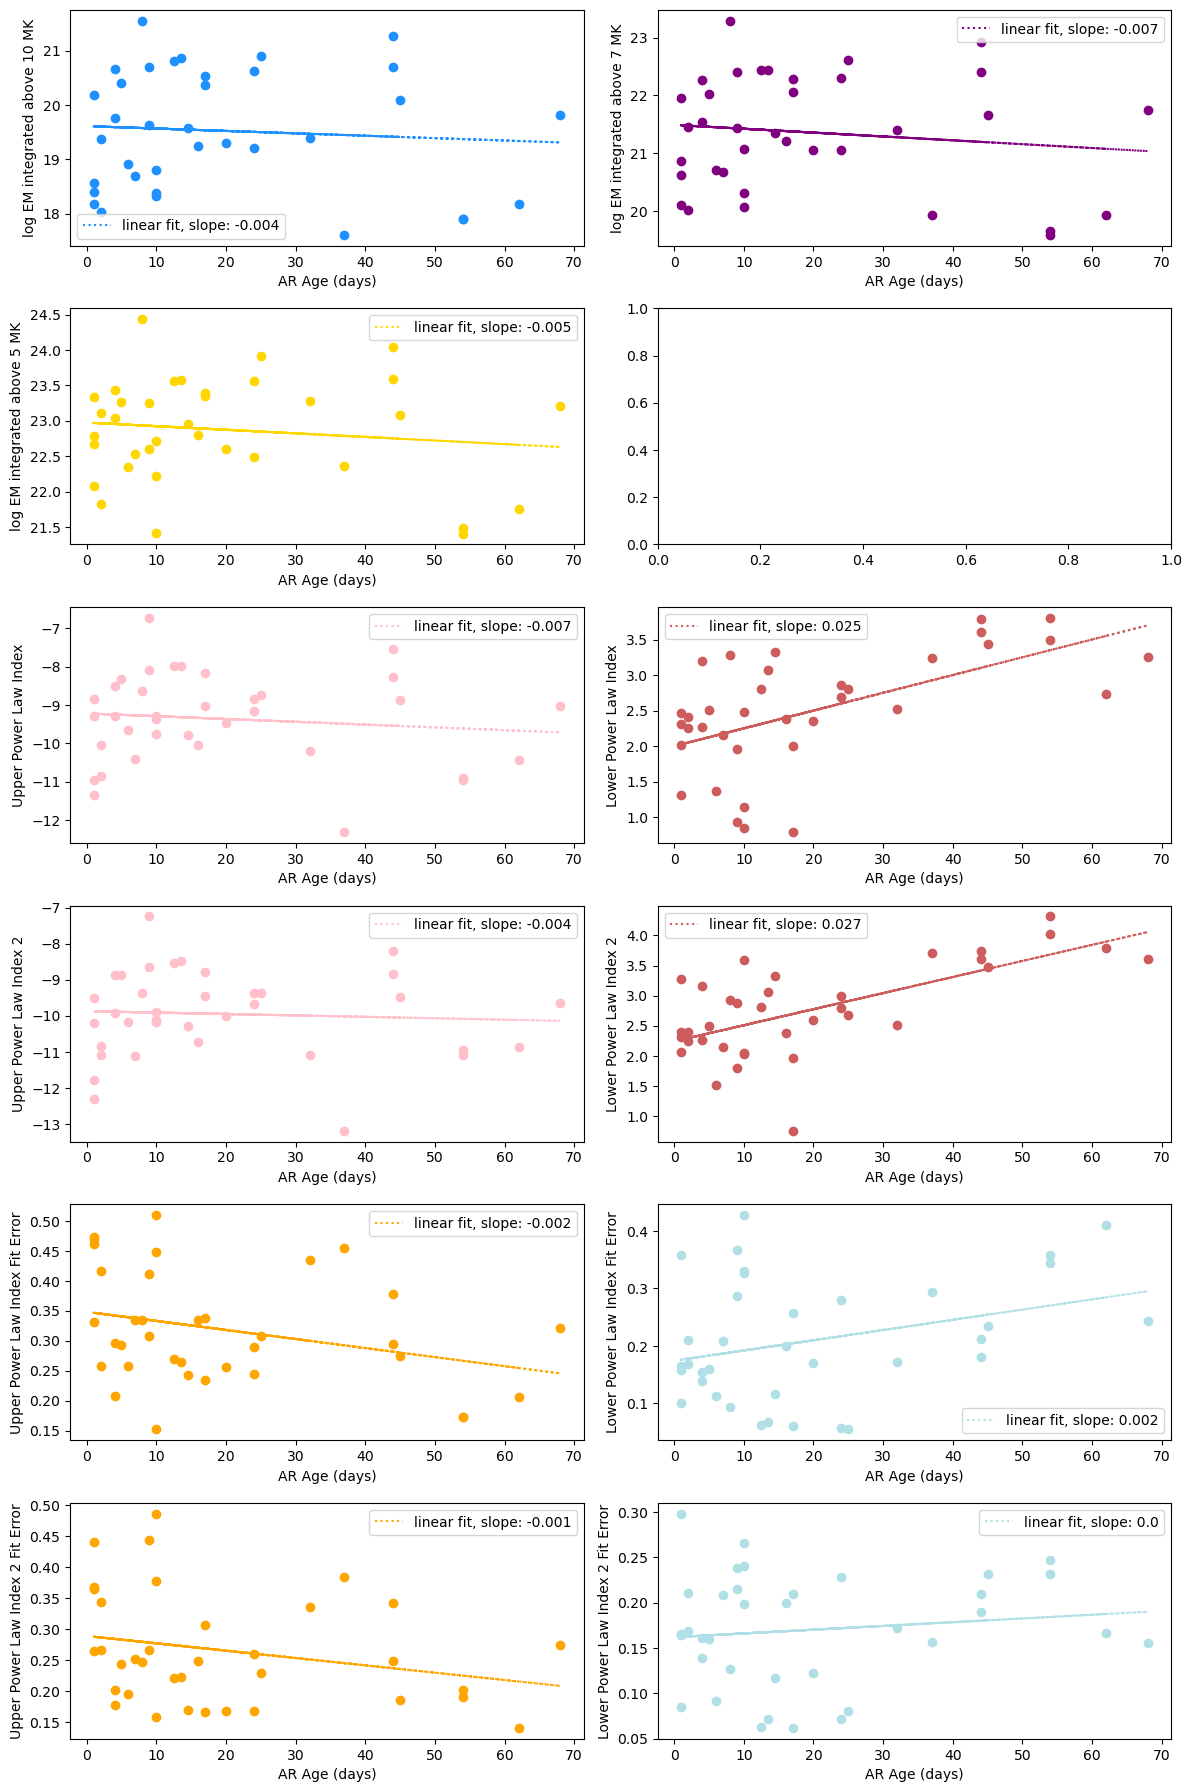

In [143]:

fig, axes = plt.subplots(6,2, figsize=(12, 18), tight_layout = {'pad': 1})


ax=axes[0,0]

dataparam, ages = get_ages_vs_params(all_targets, param='above10')
ylabel='log EM integrated above 10 MK'
tcolor='dodgerblue'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[0,1]

dataparam, ages = get_ages_vs_params(all_targets, param='above7')
ylabel='log EM integrated above 7 MK'
tcolor='purple'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[1,0]


dataparam, ages = get_ages_vs_params(all_targets, param='above5')
ylabel='log EM integrated above 5 MK'
tcolor='gold'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

# ax=axes[1,1]

# dataparam, ages = get_ages_vs_params(all_targets, param='spexkT')
# ylabel='Isothermal Fit T (MK)'
# tcolor='green'

# ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
# m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
# fity = ages[:,0]*m + b
# ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
# ax.legend()
# ax.set_ylabel(ylabel)
# ax.set_xlabel('AR Age (days)')

ax=axes[2,0]

dataparam, ages = get_ages_vs_params(all_targets, param='upperpower')
ylabel='Upper Power Law Index'
tcolor='pink'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[2,1]

dataparam, ages = get_ages_vs_params(all_targets, param='lowerpower')
ylabel='Lower Power Law Index'
tcolor='indianred'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[4,1]

dataparam, ages = get_ages_vs_params(all_targets, param='lowerpower')
ylabel='Lower Power Law Index Fit Error'
tcolor='powderblue'

ax.scatter(ages[:,0], dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,1], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')



ax=axes[4,0]

dataparam, ages = get_ages_vs_params(all_targets, param='upperpower')
ylabel='Upper Power Law Index Fit Error'
tcolor='orange'

ax.scatter(ages[:,0], dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,1], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[3,0]

dataparam, ages = get_ages_vs_params(all_targets, param='upperpower2')
ylabel='Upper Power Law Index 2'
tcolor='pink'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[3,1]

dataparam, ages = get_ages_vs_params(all_targets, param='lowerpower2')
ylabel='Lower Power Law Index 2'
tcolor='indianred'

ax.scatter(ages[:,0], dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,0], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[5,1]

dataparam, ages = get_ages_vs_params(all_targets, param='lowerpower2')
ylabel='Lower Power Law Index 2 Fit Error'
tcolor='powderblue'

ax.scatter(ages[:,0], dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,1], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')



ax=axes[5,0]

dataparam, ages = get_ages_vs_params(all_targets, param='upperpower2')
ylabel='Upper Power Law Index 2 Fit Error'
tcolor='orange'

ax.scatter(ages[:,0], dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages[:,0], dataparam[:,1], 1)
fity = ages[:,0]*m + b
ax.plot(ages[:,0], fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

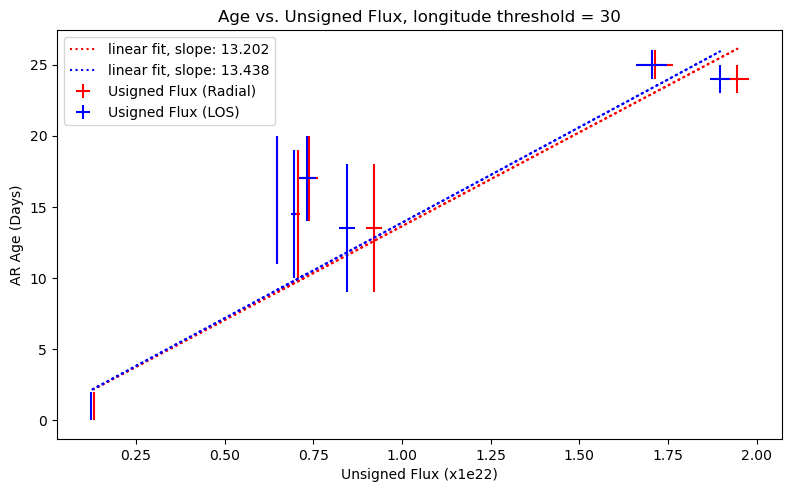

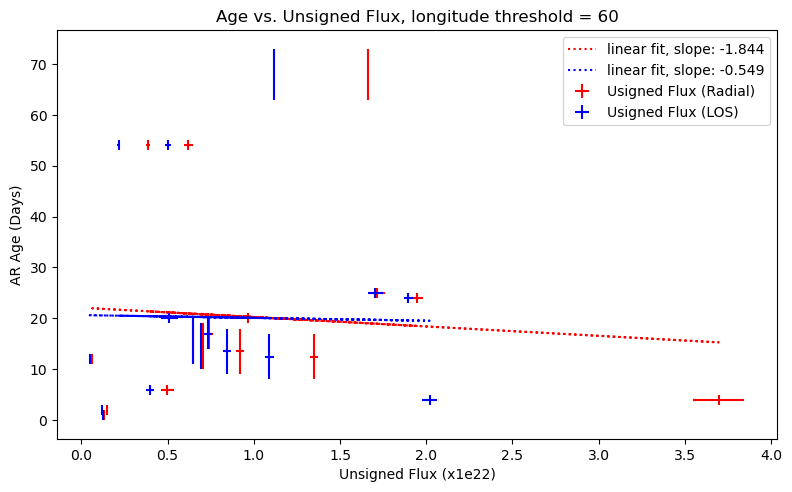

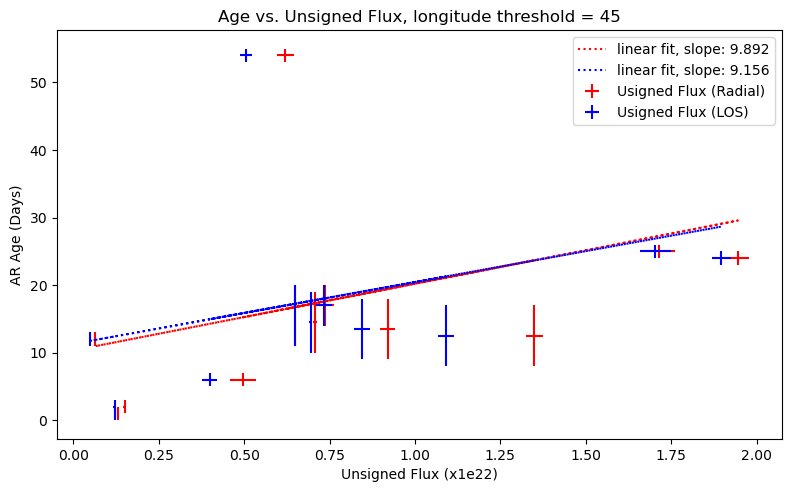

In [96]:
#Unsigned flux vs. AGE


def get_all_orbit_avg(indslist, parray, lonarray, lonthresh=60):

    """
    Keywords
    ---------

    indlist: list of lists of indices (specifying times of interest)
    parayy: parameter array (to be indexed by the indices above, function returns mean and stdv of 
                input parameter at those indices).
    lonarray: array of corresponding longitude values
    lonthresh: mean, stdv will only include values from times where the longitude is within the chosen
                    symmetric bounds (e.g. for lonthreshold=60, values must be within +/- 60 from center).

                    
    """

    allvals = []
    alllons = []
    #alltimes = []
    for o in indslist:
        #print('indices: ', o)
        #print(parray[o])
        allvals.extend(parray[o])
        alllons.extend(lonarray[o])
        #alltimes.extend(timearray[o])

    alllons = np.array(alllons)

    #print('longitudes: ', alllons)
    #print('times: ', alltimes)

    goodloninds = np.where(np.logical_and(alllons < lonthresh, alllons > -1*lonthresh))[0]

    if len(goodloninds) > 0:
        allvals = np.array(allvals)
        vv = np.mean(allvals[goodloninds])
        sv = np.std(allvals[goodloninds])
        #print(sv)
        if sv == 0.0:
            sv = vv*0.1
            #print('new: ', sv)
    
        return np.array([vv, (vv-sv), (vv+sv)])
        
    else:
        return


lonthresh=30

def fetch_age_and_usflux(all_targets, lonthresh=30, plot=True):

    params_of_interest = []
    
    uflxr = []
    uflxl = []
    ages = []
    for kk in all_targets.keys():
        #print(kk)
        #print(all_targets[kk])
    
        for i in range(0, len(all_targets[kk]['HARP'])):
            #print(all_targets[kk]['HARP'][i])
            if all_targets[kk]['HARP params'][i] and all_targets[kk]['Region Ages']:
    
                uflxr_ = get_all_orbit_avg(all_targets[kk]['HARP params'][i]['per_orbit_intersect_indices'], 
                                  all_targets[kk]['HARP params'][i]['usflux_rad'], all_targets[kk]['HARP params'][i]['lon_fwt'],
                                           lonthresh=lonthresh)
                if uflxr_ is not None:
                
                    #print(kk, all_targets[kk]['HARP'][i])
                    ages.append(np.array(all_targets[kk]['Region Ages'][i]))
                    uflxr.append(uflxr_)
                    uflxl.append(get_all_orbit_avg(all_targets[kk]['HARP params'][i]['per_orbit_intersect_indices'], 
                                  all_targets[kk]['HARP params'][i]['usflux_los'], all_targets[kk]['HARP params'][i]['lon_fwt'],
                                              lonthresh=lonthresh))
                #print(usflux_rad)
                #print('')
            else:
                pass
                #print('No HARP params for ', all_targets[kk]['sub_keys'][i])
                #print('')

    hparr = [u/1e22 for u in uflxr]
    hparl = [u/1e22 for u in uflxl]

    ages, hparr, hparl = np.array(ages), np.array(hparr), np.array(hparl)

    if plot:
        ageerr = [ages[:,0]-ages[:,1], ages[:,2]-ages[:,0]]
        ww = [1/he for he in ageerr[0]]
        herr = [hparr[:,0]-hparr[:,1], hparr[:,2]-hparr[:,0]]
        herl = [hparl[:,0]-hparl[:,1], hparl[:,2]-hparl[:,0]]
        
        fig = plt.figure(figsize=(8, 5), tight_layout = {'pad': 1})
        
        
        plt.errorbar(hparr[:,0], ages[:,0], yerr=ageerr, xerr=herr, linestyle='none', color='red', label='Usigned Flux (Radial)')#, marker='o')
        
        m, b = np.polyfit(hparr[:,0], ages[:,0], 1, w=ww)
        fity = np.array(hparr[:,0])*m + b
        plt.plot(hparr[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color='red')
        
        plt.errorbar(hparl[:,0], ages[:,0], yerr=ageerr, xerr=herl, linestyle='none', color='blue', label='Usigned Flux (LOS)')#, marker='o')
        
        m, b = np.polyfit(hparl[:,0], ages[:,0], 1, w=ww)
        fity = np.array(hparl[:,0])*m + b
        plt.plot(hparl[:,0], fity, linestyle='dotted', label='linear fit, slope: '+str(round(m,3)), color='blue')

        plt.xlabel('Unsigned Flux (x1e22)')
        plt.ylabel('AR Age (Days)')
        plt.title('Age vs. Unsigned Flux, longitude threshold = '+str(lonthresh))
        plt.legend()

    
fetch_age_and_usflux(all_targets, lonthresh=30)
print('')
fetch_age_and_usflux(all_targets, lonthresh=60)
print('')
fetch_age_and_usflux(all_targets, lonthresh=45)
